In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm import tqdm_notebook
from fastai.vision import *
from fastai.metrics import error_rate

from preparation import get_logos, get_nr2classname_dict
nr2c = get_nr2classname_dict()
c2nr = {a:int(aa) for aa,a in nr2c.items()}
logos = get_logos()
len(logos)

5235

In [2]:
logos = list(filter(lambda x: x.logo, logos))
len(logos)

2235

In [3]:
logos[0].ann[0].bb # x1 y1 x2 y2, where (y1,x1) is top left corner

[411, 499, 464, 538]

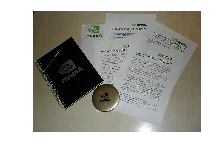

In [4]:
def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

def get_topleft_point(bb): # returns two numbers (y,x)
    return tensor([bb[1], bb[0]]).float()

name2p = {x.path.name:get_topleft_point(x.ann[0].bb) for x in logos}
img = open_image(logos[0].path)
img.show(y=get_ip(img,name2p[logos[0].path.name]))

In [5]:
img.size

torch.Size([740, 1024])

In [6]:
files = [x.path for x in logos]
name2test = { x.path.name:x.test for x in logos }

def get_middle_point(bb): # returns two numbers (y,x)
    x = (bb[0] + bb[2]) / 2
    y = (bb[1] + bb[3]) / 2
    return tensor([ y, x ]).float()

name2p = {x.path.name:get_middle_point(x.ann[0].bb) for x in logos}

tfms = get_transforms()

data = (PointsItemList(files)
            .split_by_valid_func(lambda x: name2test[ x.name ])
            .label_from_func(lambda x: name2p[ x.name ])
            .transform(tfms,  size=(224,224), tfm_y=False) # for some reason tfm_y=True sometimes returns tensor w/ shape [b,0,2] instead of [b,1,2]
            .databunch(bs=16, num_workers=4)               # , so the points are not scaled and are bad
            .normalize(imagenet_stats)
       )

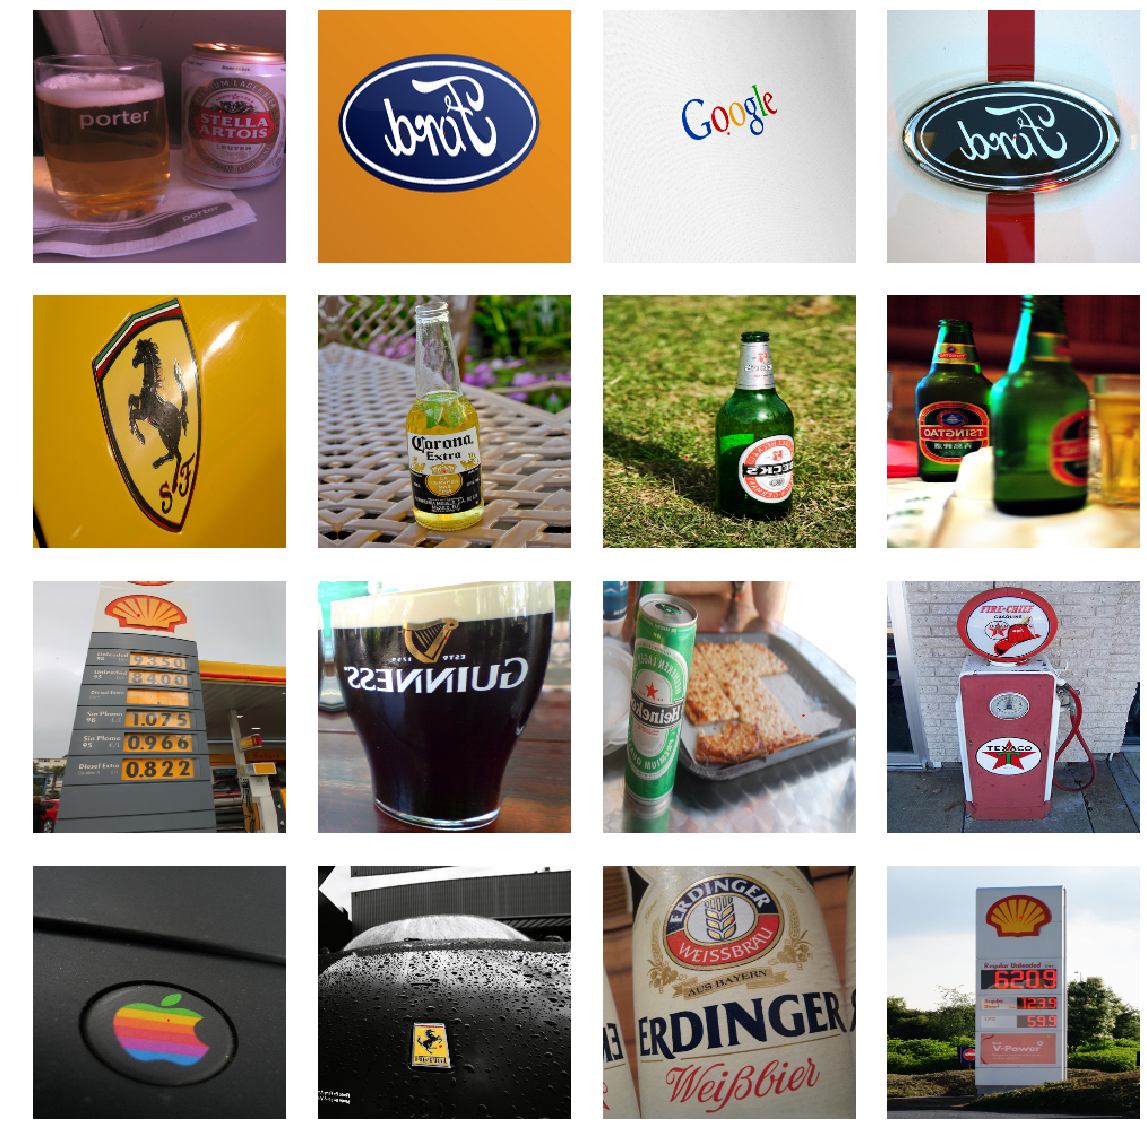

In [7]:
data.show_batch()

In [9]:
valid_dl = data.dl(ds_type=DatasetType.Valid)
for i,(x,y) in enumerate(valid_dl):
    print(x.shape, y.shape)
    if i > 0: break

torch.Size([16, 3, 224, 224]) torch.Size([16, 1, 2])
torch.Size([16, 3, 224, 224]) torch.Size([16, 1, 2])


In [16]:
learn = create_cnn(data, models.resnet34)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


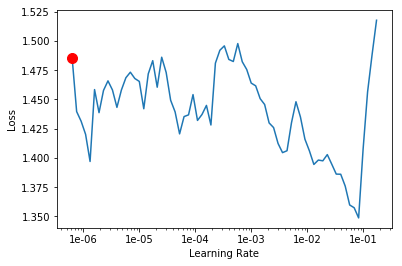

In [17]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=5e-3)

epoch,train_loss,valid_loss
1,1.172616,0.691305
2,0.621765,0.190892


In [24]:
a = slice(1)
print(a.stop)

1


In [23]:
if None:
    print('asd')